# Imports

In [77]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка данных

In [4]:
path = '/content/drive/MyDrive/data.xlsx'
df = pd.read_excel(path)
print(df.head(5))

   client_id      sum      status     sale new/current  Unnamed: 5  document  \
0        NaN      NaN    Май 2021      NaN         NaN         NaN       NaN   
1        6.0  11693.7  ВНУТРЕННИЙ        -           -         NaN         -   
2       14.0   5452.7    ОПЛАЧЕНО  Петрова       новая         NaN  оригинал   
3       15.0  13991.7    ОПЛАЧЕНО   Иванов     текущая         NaN  оригинал   
4       16.0    719.7    ОПЛАЧЕНО   Иванов     текущая         NaN  оригинал   

        receiving_date  
0                  NaN  
1                    -  
2  2021-07-26 00:00:00  
3  2021-06-08 00:00:00  
4  2021-06-08 00:00:00  


# Разделение данных по месяцам

In [62]:
may_begin_filter = df['status'] == 'Май 2021'
may_begin = df.loc[may_begin_filter]

june_begin_filter = df['status'] == 'Июнь 2021'
june_begin = df.loc[june_begin_filter]

july_begin_filter = df['status'] == 'Июль 2021'
july_begin = df.loc[july_begin_filter]

august_begin_filter = df['status'] == 'Август 2021'
august_begin = df.loc[august_begin_filter]

september_begin_filter = df['status'] == 'Сентябрь 2021'
september_begin = df.loc[september_begin_filter]

october_begin_filter = df['status'] == 'Октябрь 2021'
october_begin = df.loc[october_begin_filter]


В рассматриваемой базе данных, данные разделены по месяцам отдельными строками. Для удобства дальнейшей работы я решил создать датайфремы с информацией, разделенной по месяцам. Для этого я нашел индексы "разделительных" строк. 

In [ ]:
may = df.iloc[may_begin.index[0] + 1: june_begin.index[0]]
may

In [ ]:
june = df.iloc[june_begin.index[0] + 1: july_begin.index[0]]
june

In [ ]:
july = df.iloc[july_begin.index[0] + 1: august_begin.index[0]]
july

In [ ]:
august = df.iloc[august_begin.index[0] + 1: september_begin.index[0]]
august

In [ ]:
september = df.iloc[september_begin.index[0] + 1: october_begin.index[0]]
september

In [ ]:
october = df.iloc[october_begin.index[0] + 1:]
october

Данные по каждому месяцу расположены между "разделительных" строк, поэтому, чтобы создать датафрейм по конретному месяцу, нужно взять все строки между индексами "разделительных" строк с помощью команды **iloc**. 
Для избежания попадания "разделительной" строки в новый датафрейм начальный индекс следует увеличить на 1.
Исключение: октябрь. Информация по данному месяцу заканчивается вместе с изначальной базой данных, поэтому агрумент **end** указывать не требуется.

# Вопросы:

## 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен

Для решения задачи на июльский датафрейм накладывается условие: в столбце **'status'** хранится значение *'ОПЛАЧЕНО'*, что означает своевременный приход денежных средств.

In [73]:
oplacheno_filter = july['status'] == 'ОПЛАЧЕНО'
july_oplacheno = july.loc[oplacheno_filter]
july_oplacheno['sum'].sum()

859896.4699999997

Ответ: общая выручка за июль 2021 по тем сделкам, приход которых не просрочен, равна 859,896.47 рублей. 

## 2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

Для решения данной задачи я посчитал общую выручку за каждый месяц методом **.sum()**.

In [74]:
may_income = may['sum'].sum()
june_income = june['sum'].sum()
july_income = july['sum'].sum()
august_income = august['sum'].sum()
september_income = september['sum'].sum()
october_income = october['sum'].sum()

Для иллюстрации я использовал столбчатую диаграмму, которая отражает ежемесячную выручку.

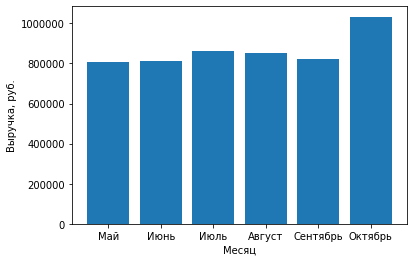

In [131]:
plt.bar(range(6), [may_income, june_income, july_income, august_income, september_income, october_income])
plt.xlabel("Месяц")
plt.ylabel("Выручка, руб.")
plt.xticks(range(6), ['Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь'])
plt.ticklabel_format(axis='y', style='plain')
plt.show()

Ответ: с мая по сентябрь ежемесячная выручка держалась около отметки в 800,000 рублей; в октябре выручка выросла до 1,000,000 рублей.

## 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

Для решения данной задачи понадобится метод **.groupby** и метод **.sum()**, которые группируют сумму выручки и менеджеров, которые принесли эту выручку.

In [84]:
september.groupby('sale')['sum'].sum().sort_values(ascending=False)

sale
Смирнов       221525.70
Петрова       149344.46
Андреев       133652.50
Иванов         94770.60
Кузнецова      72228.40
Филимонова     59514.47
Васильев       49895.45
Соколов        35183.50
Михайлов        4268.70
Name: sum, dtype: float64

Ответ: в сентябре Смирнов привлек больше всего денежных средств для компании.

## 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

Для решения данной задачи используется метод **.value_counts()**, который разбивает типы сделки на текущие и новые, а также подсчитывает количество вхождений каждого типа сделки.

In [136]:
october['new/current'].value_counts()

текущая    99
новая      36
Name: new/current, dtype: int64

Ответ: текущий тип сделки был преобладающим в октябре 2021.

## 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

Для решения задачи сперва поставим условие о том, что договор должен быть оригинальным.

In [111]:
may_original_filter = may['document'] == 'оригинал'
may_original = may.loc[may_original_filter]

Затем создадим новый столбец **'month'**, куда внесем номер месяца, в котором был получен договор. Далее поставим условие, что договор был получен в июне.

In [ ]:
time = pd.to_datetime(may_original['receiving_date'])
may_original['month'] = time.dt.month
may_document_in_june_filter = may_original['month'] == 6
may_document_in_june = may_original.loc[may_document_in_june_filter]

Число строк полученного датафрейма можно посчитать при помощи команды **shape[0]**.

In [113]:
may_document_in_june.shape[0]

76

Ответ: 76 оригиналов договора по майским сделкам было получено в июне 2021

# Задание:

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и
3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме
«ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по
мере прихода оригиналов.
Вычислите остаток каждого из менеджеров на 01.07.2021.

Поскольку необходимо вычислить остаток на 01.07 имеет смысл считать бонусы лишь за май и июнь. Условие также глосит, что если договор пришел не в тот же месяц, а позже, то и бонус будет зачислен позже.

Сначала рассмотрим бонусы за **новые** сделки. Следует рассмотреть 3 случая:

1. в мае все условия соблюдены, и договор получен в мае; 
2. в мае все условия соблюдены, и договор получен в июне;
3. в июне все условия соблюдены, и договор получен в июне.




In [ ]:
may_new_filter = may['new/current'] == 'новая'
may_oplacheno_filter = may['status'] == 'ОПЛАЧЕНО'
may_original_filter = may['document'] == 'оригинал'
may_new_oplacheno_orignal = may.loc[may_new_filter & may_oplacheno_filter & may_original_filter]

time = pd.to_datetime(may_new_oplacheno_orignal['receiving_date'])
may_new_oplacheno_orignal['month'] = time.dt.month

may_new_oplacheno_original_v_mae_filter = may_new_oplacheno_orignal['month'] == 5
may_new_oplacheno_original_v_iune_filter = may_new_oplacheno_orignal['month'] == 6
may_new_oplacheno_original_v_mae = may_new_oplacheno_orignal.loc[may_new_oplacheno_original_v_mae_filter]
may_new_oplacheno_original_v_iune = may_new_oplacheno_orignal.loc[may_new_oplacheno_original_v_iune_filter]

In [ ]:
june_new_filter = june['new/current'] == 'новая'
june_oplacheno_filter = june['status'] == 'ОПЛАЧЕНО'
june_original_filter = june['document'] == 'оригинал'
june_new_oplacheno_orignal = june.loc[june_new_filter & june_oplacheno_filter & june_original_filter]

time = pd.to_datetime(june_new_oplacheno_orignal['receiving_date'])
june_new_oplacheno_orignal['month'] = time.dt.month

june_new_oplacheno_original_v_iune_filter = june_new_oplacheno_orignal['month'] == 6
june_new_oplacheno_original_v_iune = june_new_oplacheno_orignal.loc[june_new_oplacheno_original_v_iune_filter]

Итого по **новым** сделкам:

1. 0 вхождений по первому пункту;
2. 4 входжения по второму пункту; (may_new_oplacheno_original_v_iune)
3. 0 вхождений по третьему пункту.



Теперь рассмотрим бонусы по **текущим** сделкам: Следует рассмотреть 6 вариантов(при условии, что все условия соблюдены):

1. сделка в мае, документ в мае, меньше 10,000;
2. сделка в мае, документ в мае, больше 10,000;
3. сделка в мае, документ в июне, меньше 10,000;
4. сделка в мае, документ в июне, больше 10,000;
5. сделка в июне, документ в июне, меньше 10,000;
6. сделка в июне, документ в июне, больше 10,000.




In [ ]:
may_current_filter = may['new/current'] == 'текущая'
may_ne_prosrocheno_filter = may['status'] != 'ПРОСРОЧЕНО'
may_original_filter = may['document'] == 'оригинал'
may_current_ne_prosrocheno_orignal = may.loc[may_current_filter & may_ne_prosrocheno_filter & may_original_filter]

time = pd.to_datetime(may_current_ne_prosrocheno_orignal['receiving_date'])
may_current_ne_prosrocheno_orignal['month'] = time.dt.month

may_current_ne_prosrocheno_orignal_v_mae_filter = may_current_ne_prosrocheno_orignal['month'] == 5
may_current_ne_prosrocheno_orignal_v_iune_filter = may_current_ne_prosrocheno_orignal['month'] == 6
may_current_ne_prosrocheno_orignal_v_mae = may_current_ne_prosrocheno_orignal.loc[may_current_ne_prosrocheno_orignal_v_mae_filter]
may_current_ne_prosrocheno_orignal_v_iune = may_current_ne_prosrocheno_orignal.loc[may_current_ne_prosrocheno_orignal_v_iune_filter]

may_current_ne_prosrocheno_orignal_v_mae_bigger_filter = may_current_ne_prosrocheno_orignal_v_mae['sum'] >= 10000
may_current_ne_prosrocheno_orignal_v_mae_smaller_filter = may_current_ne_prosrocheno_orignal_v_mae['sum'] < 10000
may_current_ne_prosrocheno_orignal_v_mae_bigger = may_current_ne_prosrocheno_orignal_v_mae.loc[may_current_ne_prosrocheno_orignal_v_mae_bigger_filter]
may_current_ne_prosrocheno_orignal_v_mae_smaller = may_current_ne_prosrocheno_orignal_v_mae.loc[may_current_ne_prosrocheno_orignal_v_mae_smaller_filter]

may_current_ne_prosrocheno_orignal_v_iune_bigger_filter = may_current_ne_prosrocheno_orignal_v_iune['sum'] >= 10000
may_current_ne_prosrocheno_orignal_v_iune_smaller_filter = may_current_ne_prosrocheno_orignal_v_iune['sum'] < 10000
may_current_ne_prosrocheno_orignal_v_iune_bigger = may_current_ne_prosrocheno_orignal_v_iune.loc[may_current_ne_prosrocheno_orignal_v_iune_bigger_filter]
may_current_ne_prosrocheno_orignal_v_iune_smaller = may_current_ne_prosrocheno_orignal_v_iune.loc[may_current_ne_prosrocheno_orignal_v_iune_smaller_filter]

In [ ]:
june_current_filter = june['new/current'] == 'текущая'
june_ne_prosrocheno_filter = june['status'] != 'ПРОСРОЧЕНО'
june_original_filter = june['document'] == 'оригинал'
june_current_ne_prosrocheno_orignal = june.loc[june_current_filter & june_ne_prosrocheno_filter & june_original_filter]

time = pd.to_datetime(june_current_ne_prosrocheno_orignal['receiving_date'])
june_current_ne_prosrocheno_orignal['month'] = time.dt.month

june_current_ne_prosrocheno_orignal_v_iune_filter = june_current_ne_prosrocheno_orignal['month'] == 6
june_current_ne_prosrocheno_orignal_v_iune = june_current_ne_prosrocheno_orignal.loc[june_current_ne_prosrocheno_orignal_v_iune_filter]

june_current_ne_prosrocheno_orignal_v_iune_bigger_filter = june_current_ne_prosrocheno_orignal_v_iune['sum'] >= 10000
june_current_ne_prosrocheno_orignal_v_iune_smaller_filter = june_current_ne_prosrocheno_orignal_v_iune['sum'] < 10000
june_current_ne_prosrocheno_orignal_v_iune_bigger = june_current_ne_prosrocheno_orignal_v_iune.loc[june_current_ne_prosrocheno_orignal_v_iune_bigger_filter]
june_current_ne_prosrocheno_orignal_v_iune_smaller = june_current_ne_prosrocheno_orignal_v_iune.loc[june_current_ne_prosrocheno_orignal_v_iune_smaller_filter]

Итого по **текущим** сделкам:
1. 2 вхождения (may_current_ne_prosrocheno_orignal_v_mae_smaller)
2. 1 вхождение (may_current_ne_prosrocheno_orignal_v_mae_bigger)
3. 59 вхождений (may_current_ne_prosrocheno_orignal_v_iune_smaller)
4. 13 вхождений (may_current_ne_prosrocheno_orignal_v_iune_bigger)
5. 0 вхождений 
6. 0 вхождений



Добавляем информацию о бонусах в первоначальную базу данных в столбец **'bonus'**.

In [198]:
df['bonus'] = may_new_oplacheno_original_v_iune['sum'] * 0.07
df['bonus'] = may_current_ne_prosrocheno_orignal_v_mae_bigger['sum'] * 0.05
df['bonus'] = may_current_ne_prosrocheno_orignal_v_mae_smaller['sum'] * 0.03
df['bonus'] = may_current_ne_prosrocheno_orignal_v_iune_bigger['sum'] * 0.05
df['bonus'] = may_current_ne_prosrocheno_orignal_v_iune_smaller['sum'] * 0.03

In [199]:
df.groupby('sale')['bonus'].sum().sort_values(ascending=False)

sale
Петрова       2514.5430
Кузнецова     2180.5395
Смирнов        689.2440
Андреев        568.2627
Иванов         552.5340
Селиванов      353.3220
Филимонова     306.0720
Васильев       303.9720
-                0.0000
Михайлов         0.0000
Попов            0.0000
Соколов          0.0000
Name: bonus, dtype: float64

Остаток каждого из менеджеров на 01.07.2021:

1. Петрова - 2514
2. Кузнецов - 2180
3. Смирнов - 689
4. Андреев - 568
5. Иванов - 552
6. Селиванов - 353
7. Филимонова - 306
8. Васильев - 303
9. Михайлов - 0
10. Попов- 0
11. Соколов - 0

